In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importation des débits de la Lonza

In [2]:

débit = pd.read_csv('2269_Abfluss_Tagesmittel_1956-01-01_2024-10-10.csv', sep=";",skiprows=8,encoding = "ISO-8859-1")

In [3]:
débit

,Stationsname,Stationsnummer,Parameter,Zeitreihe,Parametereinheit,Gewässer,Zeitstempel,Zeitpunkt_des_Auftretens,Wert,Freigabestatus
0,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,1956-01-01 00:00:00,NaN,0.580,"Freigegeben, validierte Daten"
1,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,1956-01-02 00:00:00,NaN,0.580,"Freigegeben, validierte Daten"
2,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,1956-01-03 00:00:00,NaN,0.540,"Freigegeben, validierte Daten"
3,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,1956-01-04 00:00:00,NaN,0.560,"Freigegeben, validierte Daten"
4,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,1956-01-05 00:00:00,NaN,0.530,"Freigegeben, validierte Daten"
...,...,...,...,...,...,...,...,...,...,...
25116,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,2024-10-06 00:00:00,NaN,1.529,"Nicht freigegeben, Rohdaten"
25117,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,2024-10-07 00:00:00,NaN,1.785,"Nicht freigegeben, Rohdaten"
25118,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,2024-10-08 00:00:00,NaN,4.272,"Nicht freigegeben, Rohdaten"
25119,Blatten,2269,Abfluss,Tagesmittel,m3/s,Lonza,2024-10-09 00:00:00,NaN,1.972,"Nicht freigegeben, Rohdaten"


In [4]:
débit.Zeitstempel= débit.Zeitstempel .apply(lambda x: pd.to_datetime(x[0:10],format='%Y-%m-%d' ))
série_débit = pd.Series(np.array(débit['Wert']),index=np.array(débit['Zeitstempel'])).squeeze()
série_débit

1956-01-01    0.580
1956-01-02    0.580
1956-01-03    0.540
1956-01-04    0.560
1956-01-05    0.530
              ...  
2024-10-06    1.529
2024-10-07    1.785
2024-10-08    4.272
2024-10-09    1.972
2024-10-10    4.215
Length: 25121, dtype: float64

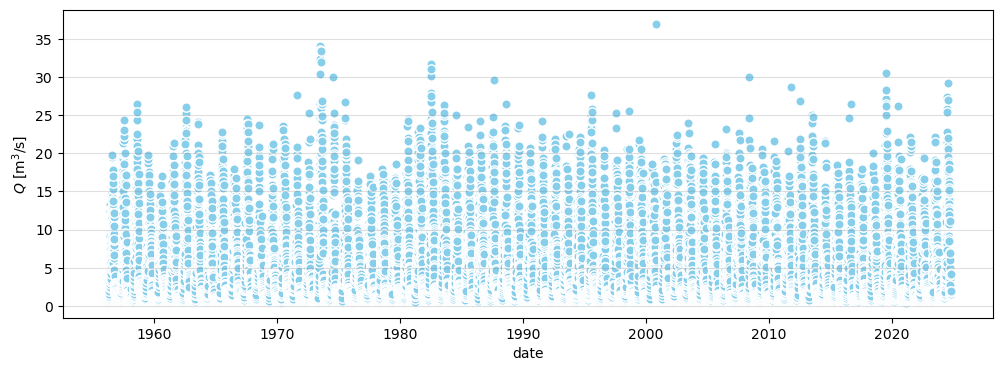

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(série_débit.index, série_débit ,  marker = "o",edgecolors='white', s=45, color='skyblue', alpha = 1)
ax.set_ylabel(r'$Q$ [m$^3$/s] ')
ax.set_xlabel(r'date')
plt.grid(axis="y", color = 'gray', alpha = 0.25)

# Importation des précipitations

## Importation du fichier global Blatten + Ried

L'importation des données de Météo Suisse demande plus de travail... et d'esprit critique !
Commençons par le fichier 'order_125919_data.txt'

In [6]:
# importation du fichier 'order_125919_data.txt'
# 'precip_heure' = précipitation horaire maximale sur une journée civile (de 0 h à 0 h TU) : rhh150dx (mm)
# 'precip_jour'  = précipitation journalière selon le protocole conventionnel (de 6 h à 6 h TU) : rre150d0 (mm)
data_1 = pd.read_csv('order_125919_data.txt',skiprows=3,sep=';',names=['station','date','precip_heure','precip_jour'],date_format='%Y%m%d',parse_dates= ['date'],na_values='-')


Comme on va le voir la colonne 'date' n'est pas dans le bon format.
L'importation a donc considéré cette information comme un objet (string) et non une date
Cela peut être dû à plusieurs choses : le format de la date qui change en cours de fichier, une ligne de commentaire, etc. 
On va voir après comment corriger cela.

In [7]:
data_1

,station,date,precip_heure,precip_jour
0,BLA,20010301,NaN,3.2
1,BLA,20010302,NaN,22.5
2,BLA,20010303,NaN,10.6
3,BLA,20010304,NaN,15.6
4,BLA,20010305,NaN,0.1
...,...,...,...,...
20784,RIE,20070326,0.0,NaN
20785,RIE,20070327,1.0,NaN
20786,RIE,20070328,0.0,NaN
20787,RIE,20070329,0.0,NaN


Dans le fichier 'order_126040_data.txt', on est censé avoir la précipitation journalière sur une journée civile (rrewntd0) et la précipitation journalière de 6 h à 6 h (rre150d0)... mais on va voir qu'il y a des problèmes...

In [8]:
# 'precip_x'     = précipitation supposée être la principation journalière sur une journée civile (de 0 h à 0 h TU)
# 'precip_jour'  = précipitation journalière selon le protocole conventionnel (de 6 h à 6 h TU)
data_2 = pd.read_csv('order_126040_data.txt',skiprows=3,sep=r'\s+',names=['station','date','precip_x','precip_jour'],date_format='%Y%m%d',parse_dates= ['date'],na_values='-')
data_2

,station,date,precip_x,precip_jour
0,BLA,20010301,NaN,3.2
1,BLA,20010302,NaN,22.5
2,BLA,20010303,NaN,10.6
3,BLA,20010304,NaN,15.6
4,BLA,20010305,NaN,0.1
...,...,...,...,...
20791,RIE,20070326,0.0,NaN
20792,RIE,20070327,1.0,NaN
20793,RIE,20070328,0.0,NaN
20794,RIE,20070329,0.0,NaN


Commeçons par savoir ce qui cloche avec les dates. On force la conversion vers le format 'date' et on regarde les erreurs :
python nous dit que l'erreur est à la ligne 8646 (data_1) ou 8653 (data_2)

In [9]:
pd.to_datetime(data_1.date)

ValueError: time data "time" doesn't match format "%Y%m%d", at position 8646. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Affichons la ligne fautive (indiquée par "position" ci-dessus).
On voit que cette ligne n'a plus d'information numérique, mais uniquement textuelle
Cela vient du fichier que le fichier importé contient les données de deux stations.

In [10]:
display(data_2.iloc[8653])
display(data_1.iloc[8646])

station             stn
date               time
precip_x       rre150d0
precip_jour         NaN
Name: 8653, dtype: object

station              stn
date                time
precip_heure    rre150d0
precip_jour          NaN
Name: 8646, dtype: object

On supprime la ligne fautive dans chaque fichier

In [11]:
data_2 = data_2.drop(8653)
data_1 = data_1.drop(8646)

Et maintenant on peut convertir les dates au format

In [12]:
# on convertit les entiers au format 'date'
data_1.date = pd.to_datetime(data_1.date)
data_2.date = pd.to_datetime(data_2.date)

In [13]:
display(data_1)
display(data_2)

,station,date,precip_heure,precip_jour
0,BLA,2001-03-01,NaN,3.2
1,BLA,2001-03-02,NaN,22.5
2,BLA,2001-03-03,NaN,10.6
3,BLA,2001-03-04,NaN,15.6
4,BLA,2001-03-05,NaN,0.1
...,...,...,...,...
20784,RIE,2007-03-26,0.0,NaN
20785,RIE,2007-03-27,1.0,NaN
20786,RIE,2007-03-28,0.0,NaN
20787,RIE,2007-03-29,0.0,NaN


,station,date,precip_x,precip_jour
0,BLA,2001-03-01,NaN,3.2
1,BLA,2001-03-02,NaN,22.5
2,BLA,2001-03-03,NaN,10.6
3,BLA,2001-03-04,NaN,15.6
4,BLA,2001-03-05,NaN,0.1
...,...,...,...,...
20791,RIE,2007-03-26,0.0,NaN
20792,RIE,2007-03-27,1.0,NaN
20793,RIE,2007-03-28,0.0,NaN
20794,RIE,2007-03-29,0.0,NaN


Regardons maintenant l'allure des colonnes pour chaque station (Blatten et Ried). Pour certaines colonnes comme 'precip_heure', il y a des données 'NA'. 
Il faut donc appliquer la fonction '.apply(pd.to_numeric, args=('coerce',))' pour forcer les valeurs numériques

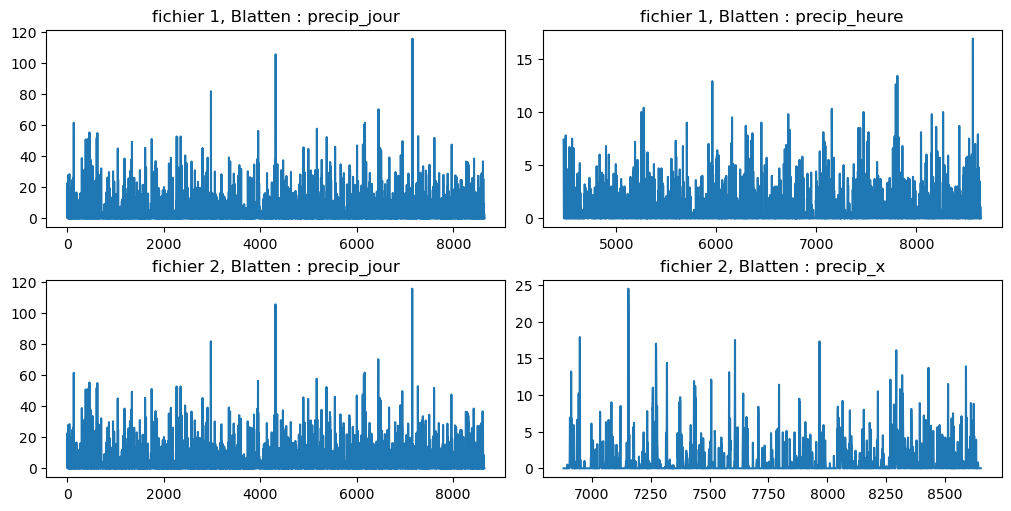

In [14]:
# Blatten
fig, ((ax1, ax2) ,(ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(5*2)
ax1.plot(data_1[data_1['station']=='BLA'].precip_jour.values)
ax1.title.set_text('fichier 1, Blatten : precip_jour')

ax2.plot(data_1[data_1['station']=='BLA'].precip_heure.apply(pd.to_numeric, args=('coerce',)).values)
ax2.title.set_text('fichier 1, Blatten : precip_heure')

ax3.plot(data_2[data_2['station']=='BLA'].precip_jour.values)
ax3.title.set_text('fichier 2, Blatten : precip_jour')

ax4.plot(data_2[data_2['station']=='BLA'].precip_x.apply(pd.to_numeric, args=('coerce',)).values)
ax4.title.set_text('fichier 2, Blatten : precip_x')

Comme on le voit ci-dessus, il y a un souci avec les données 'precip_x' qui sont censées être des données journalières (de 0 h à 0 h), or l'ordre de grandeur est le même que les précipitations horaires. On écarte ce jeu de données.. et on retient que les données journalières de 6 h à 6 h. Regardons maintenant le poste de Ried.

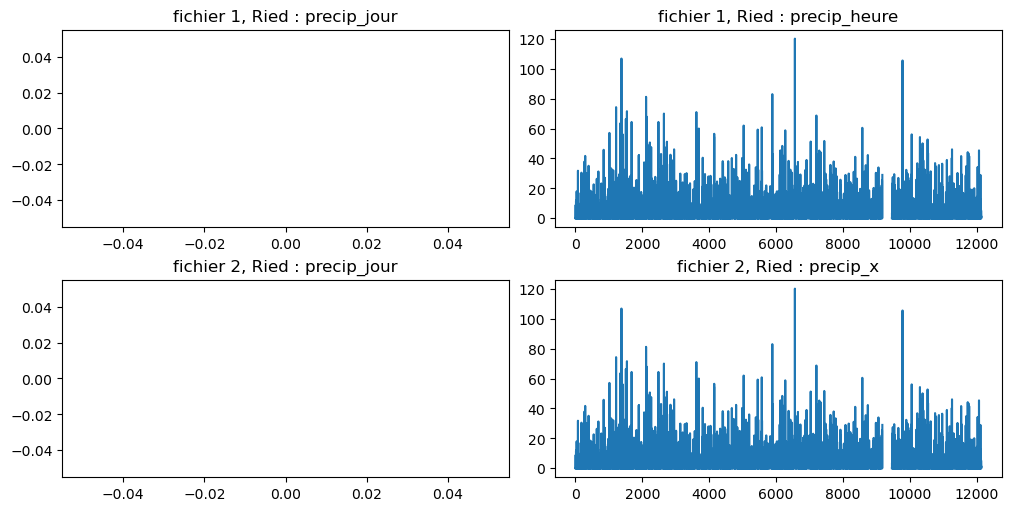

In [15]:
# Ried
fig, ((ax1, ax2) ,(ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(5*2)
ax1.plot(data_1[data_1['station']=='RIE'].precip_jour.values)
ax1.title.set_text('fichier 1, Ried : precip_jour')

ax2.plot(data_1[data_1['station']=='RIE'].precip_heure.apply(pd.to_numeric, args=('coerce',)).values)
ax2.title.set_text('fichier 1, Ried : precip_heure')

ax3.plot(data_2[data_2['station']=='RIE'].precip_jour.values)
ax3.title.set_text('fichier 2, Ried : precip_jour')

ax4.plot(data_2[data_2['station']=='RIE'].precip_x.apply(pd.to_numeric, args=('coerce',)).values)
ax4.title.set_text('fichier 2, Ried : precip_x')

Là l'information des précipitations journalières est manquante dans les deux fichiers, mais l'information horaire est présente dans le fichier 1... et manifestement il s'agit de valeurs journalières... On voit donc la prudence quand on télécharge des données.
En pratique, on va utiliser le fichier data_1
* pour Blatten, la variable des précipitations journalières sera precip_jour
* pour Ried, la variable des précipitations journalières sera precip_x

## Séparation du fichier en deux séries temporelles pour chacune des deux stations

In [16]:
# On sépare les deux stations
data = data_1
data_blatten = data[data['station']=='BLA']
data_ried = data[data['station']=='RIE']

Afin d'utiliser pour les deux stations la même variable, on crée une nouvelle colonne 'precipitation' et on lui assigne 
* soit precip_jour (Blatten),
* soit precip_heure (Ried) puisqu'en fait les précipitations journalières sont contenues dans cette variable

In [17]:
data_blatten = data_blatten.assign(precipitation=data_blatten.precip_jour)
display(data_blatten)

,station,date,precip_heure,precip_jour,precipitation
0,BLA,2001-03-01,NaN,3.2,3.2
1,BLA,2001-03-02,NaN,22.5,22.5
2,BLA,2001-03-03,NaN,10.6,10.6
3,BLA,2001-03-04,NaN,15.6,15.6
4,BLA,2001-03-05,NaN,0.1,0.1
...,...,...,...,...,...
8641,BLA,2024-10-27,0.9,0.0,0.0
8642,BLA,2024-10-28,0.0,0.0,0.0
8643,BLA,2024-10-29,0.0,0.0,0.0
8644,BLA,2024-10-30,0.0,0.0,0.0


In [18]:
data_ried

,station,date,precip_heure,precip_jour
8647,RIE,1974-01-01,0.0,NaN
8648,RIE,1974-01-02,0.0,NaN
8649,RIE,1974-01-03,0.0,NaN
8650,RIE,1974-01-04,0.0,NaN
8651,RIE,1974-01-05,2.6,NaN
...,...,...,...,...
20784,RIE,2007-03-26,0.0,NaN
20785,RIE,2007-03-27,1.0,NaN
20786,RIE,2007-03-28,0.0,NaN
20787,RIE,2007-03-29,0.0,NaN


In [19]:
data_ried = data_ried.assign(precipitation=data_ried.precip_heure.apply(pd.to_numeric, args=('coerce',)))
display(data_ried)

,station,date,precip_heure,precip_jour,precipitation
8647,RIE,1974-01-01,0.0,NaN,0.0
8648,RIE,1974-01-02,0.0,NaN,0.0
8649,RIE,1974-01-03,0.0,NaN,0.0
8650,RIE,1974-01-04,0.0,NaN,0.0
8651,RIE,1974-01-05,2.6,NaN,2.6
...,...,...,...,...,...
20784,RIE,2007-03-26,0.0,NaN,0.0
20785,RIE,2007-03-27,1.0,NaN,1.0
20786,RIE,2007-03-28,0.0,NaN,0.0
20787,RIE,2007-03-29,0.0,NaN,0.0


## Données de Blatten

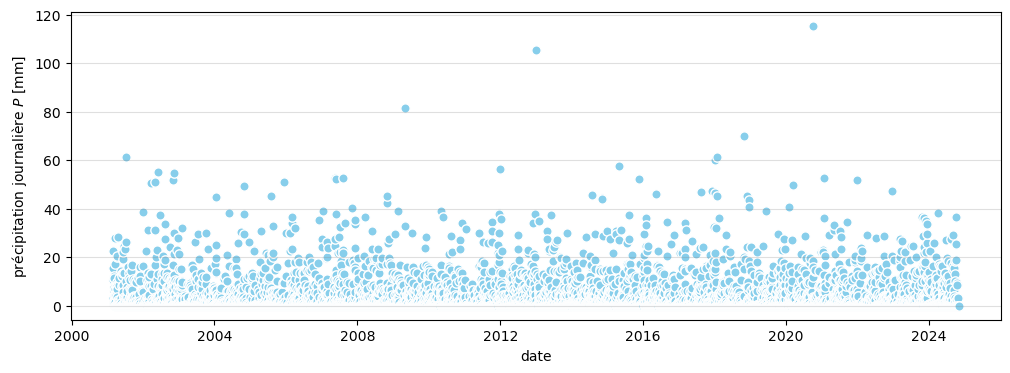

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(data_blatten.date, data_blatten.precipitation ,  marker = "o",edgecolors='white', s=45, color='skyblue', alpha = 1)
ax.set_ylabel(r'précipitation journalière $P$ [mm] ')
ax.set_xlabel(r'date')
plt.grid(axis="y", color = 'gray', alpha = 0.25)

In [21]:
print(f"La précipitation maximale sur Blatten a été {np.nanmax(data_blatten.precip_jour.values) } mm.")

La précipitation maximale sur Blatten a été 115.5 mm.


Même si on ne va pas s'en servir on peut regarder ce qu'est censée montrer la colonne 'precip_heure'. Il faut d'abord enlever
les valeurs non numériques

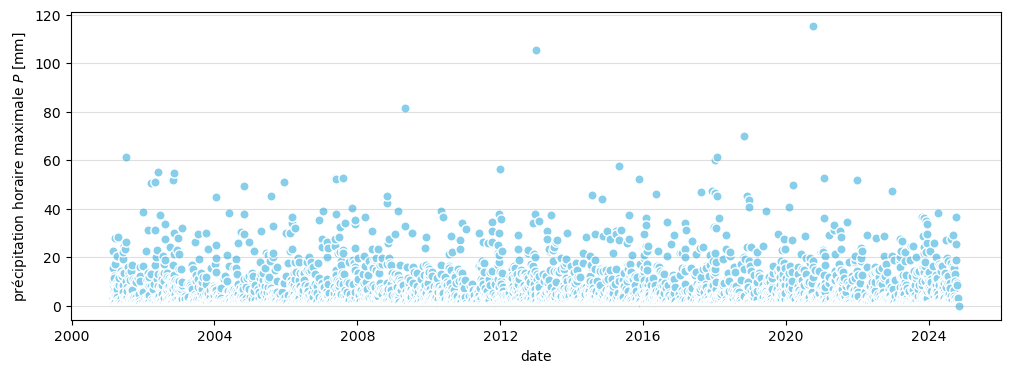

In [22]:
data_blatten.loc[:, 'precip_heure']=data_blatten.precip_heure.apply(pd.to_numeric, args=('coerce',))
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(data_blatten.date, data_blatten.precipitation,  marker = "o",edgecolors='white', s=45, color='skyblue', alpha = 1)
ax.set_ylabel(r'précipitation horaire maximale $P$ [mm] ')
ax.set_xlabel(r'date')
plt.grid(axis="y", color = 'gray', alpha = 0.25)


On peut exporter la série temporelle au format csv

In [23]:
série_blatten = data_blatten.precipitation
série_blatten.index = data_blatten.date
série_blatten.to_csv('blatten.csv')


## Données de Ried

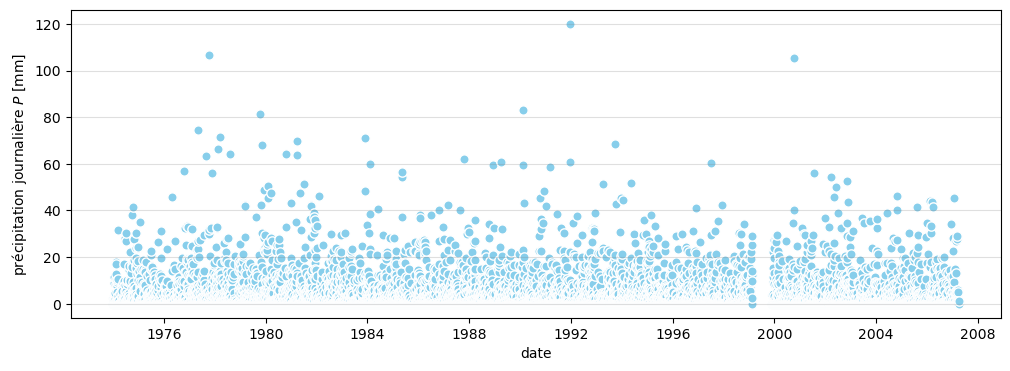

In [24]:
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(data_ried.date, data_ried.precipitation,  marker = "o",edgecolors='white', s=45, color='skyblue', alpha = 1)
ax.set_ylabel(r'précipitation journalière $P$ [mm] ')
ax.set_xlabel(r'date')
plt.grid(axis="y", color = 'gray', alpha = 0.25)

On note le trou dans les données en 1999. Le maximum sur la période 1974-2007 est

In [25]:
print(f"précipitation maximale {np.nanmax(data_ried.precipitation.values) } mm.")

précipitation maximale 120.1 mm.


On peut creuser la question des lacunes et chercher pour quelles dates exactes les données sont manquantes ou nulles. Manifestement, elles sont toutes nulles

In [26]:
data_ried[(data_ried.date.dt.year==1999) & ~(data_ried.precipitation.values>0)]

,station,date,precip_heure,precip_jour,precipitation
17778,RIE,1999-01-01,0.0,NaN,0.0
17782,RIE,1999-01-05,0.0,NaN,0.0
17783,RIE,1999-01-06,0.0,NaN,0.0
17792,RIE,1999-01-15,0.0,NaN,0.0
17793,RIE,1999-01-16,0.0,NaN,0.0
...,...,...,...,...,...
18131,RIE,1999-12-20,0.0,NaN,0.0
18132,RIE,1999-12-21,0.0,NaN,0.0
18133,RIE,1999-12-22,0.0,NaN,0.0
18134,RIE,1999-12-23,0.0,NaN,0.0


On peut comparer les deux séries temporelles de Blatten et Ried en créant un nouveau dataframe

In [27]:
df = pd.merge(data_blatten, data_ried, how='inner', on=['date'])
display(df)

,station_x,date,precip_heure_x,precip_jour_x,precipitation_x,station_y,precip_heure_y,precip_jour_y,precipitation_y
0,BLA,2001-03-01,NaN,3.2,3.2,RIE,3.8,NaN,3.8
1,BLA,2001-03-02,NaN,22.5,22.5,RIE,30.1,NaN,30.1
2,BLA,2001-03-03,NaN,10.6,10.6,RIE,10.5,NaN,10.5
3,BLA,2001-03-04,NaN,15.6,15.6,RIE,18.0,NaN,18.0
4,BLA,2001-03-05,NaN,0.1,0.1,RIE,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
2216,BLA,2007-03-26,NaN,0.4,0.4,RIE,0.0,NaN,0.0
2217,BLA,2007-03-27,NaN,0.1,0.1,RIE,1.0,NaN,1.0
2218,BLA,2007-03-28,NaN,0.0,0.0,RIE,0.0,NaN,0.0
2219,BLA,2007-03-29,NaN,0.0,0.0,RIE,0.0,NaN,0.0


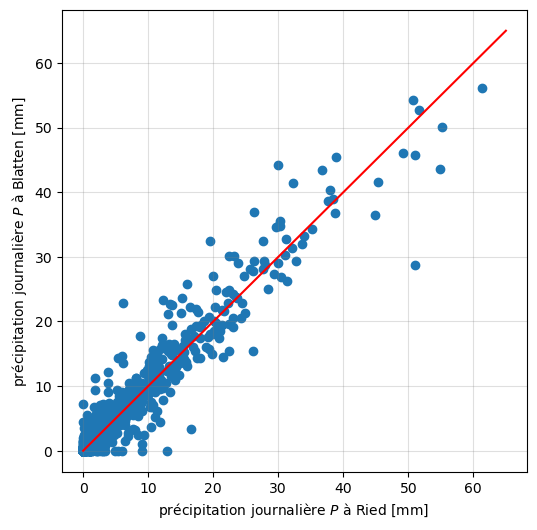

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot([0,65],[0,65],color='red')
ax.set_ylabel(r'précipitation journalière $P$ à Blatten [mm] ')
ax.set_xlabel(r'précipitation journalière $P$ à Ried [mm] ')
plt.grid(axis="x", color = 'gray', alpha = 0.25)
plt.grid(axis="y", color = 'gray', alpha = 0.25)
ax.scatter(df.precipitation_x,df.precipitation_y)

On peut exporter la série temporelle au format csv

In [29]:
série_ried = data_ried.precipitation
série_ried.index = data_ried.date
série_ried.to_csv('ried.csv')